以下のパラメータでシミュレーションを実行して、hopG = 1 の場合に hopL を増やすと協力率がどの様に変化するかを確認する。

```julia
# ../data/20220505_hopG=1_hopL=1_10.csv
# simulation_pattern: 3000
trial_count = 100
agent_count = 10^3
generations = 10^3

network_type_list = [:scale_free_4, :regular_4, :random_4]
hop_game_list = [1]
hop_learning_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b_list = [4.0, 4.5, 5.0, 5.5, 6.0]
μ_list = [0.0, 0.01]  # [0.0, 0.01]
δ_list = [0.0625, 0.125, 0.25, 0.5, 1.0]
update_rule_list = [DB, IM]
```

In [1]:
import glob
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set(font_scale = 1.0, style = 'darkgrid')

In [2]:
COLUMNS = {
    'network_type': 'category',
    'hop_game': int,
    'hop_learning': int,
    'b': float,
    'μ': float,
    'δ': float,
    'update_rule': 'category',
    'trial': int,
    'step': int,
    'cooperator_rate': float
}
GROUPBY_COLUMNS = [c for c in COLUMNS if c not in ['hop_game', 'trial', 'step', 'cooperator_rate']]

def load_df(csv_file_name: str) -> pd.DataFrame:
    __df = pd.read_csv(csv_file_name, header=None, names=COLUMNS.keys(), dtype=COLUMNS)
    return __df[__df.step >= 800].groupby(GROUPBY_COLUMNS).agg({'cooperator_rate': np.mean}).reset_index()

In [3]:
%%time
# Load
dir_name = '20220528_144932'
file_list = glob.glob('../../data/{}/*'.format(dir_name))
print(len(file_list))

df_list = [load_df(file) for file in file_list]
df = pd.concat(df_list).groupby(GROUPBY_COLUMNS).agg({'cooperator_rate': np.mean}).reset_index()
df

100
CPU times: user 10.7 s, sys: 1.05 s, total: 11.7 s
Wall time: 11.7 s


,network_type,hop_learning,b,μ,δ,update_rule,cooperator_rate
0,random_4,1,4.0,0.00,0.0625,DB,0.000000
1,random_4,1,4.0,0.00,0.0625,IM,0.000822
2,random_4,1,4.0,0.00,0.1250,DB,0.000000
3,random_4,1,4.0,0.00,0.1250,IM,0.044062
4,random_4,1,4.0,0.00,0.2500,DB,0.000000
...,...,...,...,...,...,...,...
2995,scale_free_4,10,6.0,0.01,0.2500,IM,0.471851
2996,scale_free_4,10,6.0,0.01,0.5000,DB,1.000000
2997,scale_free_4,10,6.0,0.01,0.5000,IM,0.469347
2998,scale_free_4,10,6.0,0.01,1.0000,DB,1.000000


CPU times: user 2.84 s, sys: 19.3 ms, total: 2.86 s
Wall time: 2.85 s


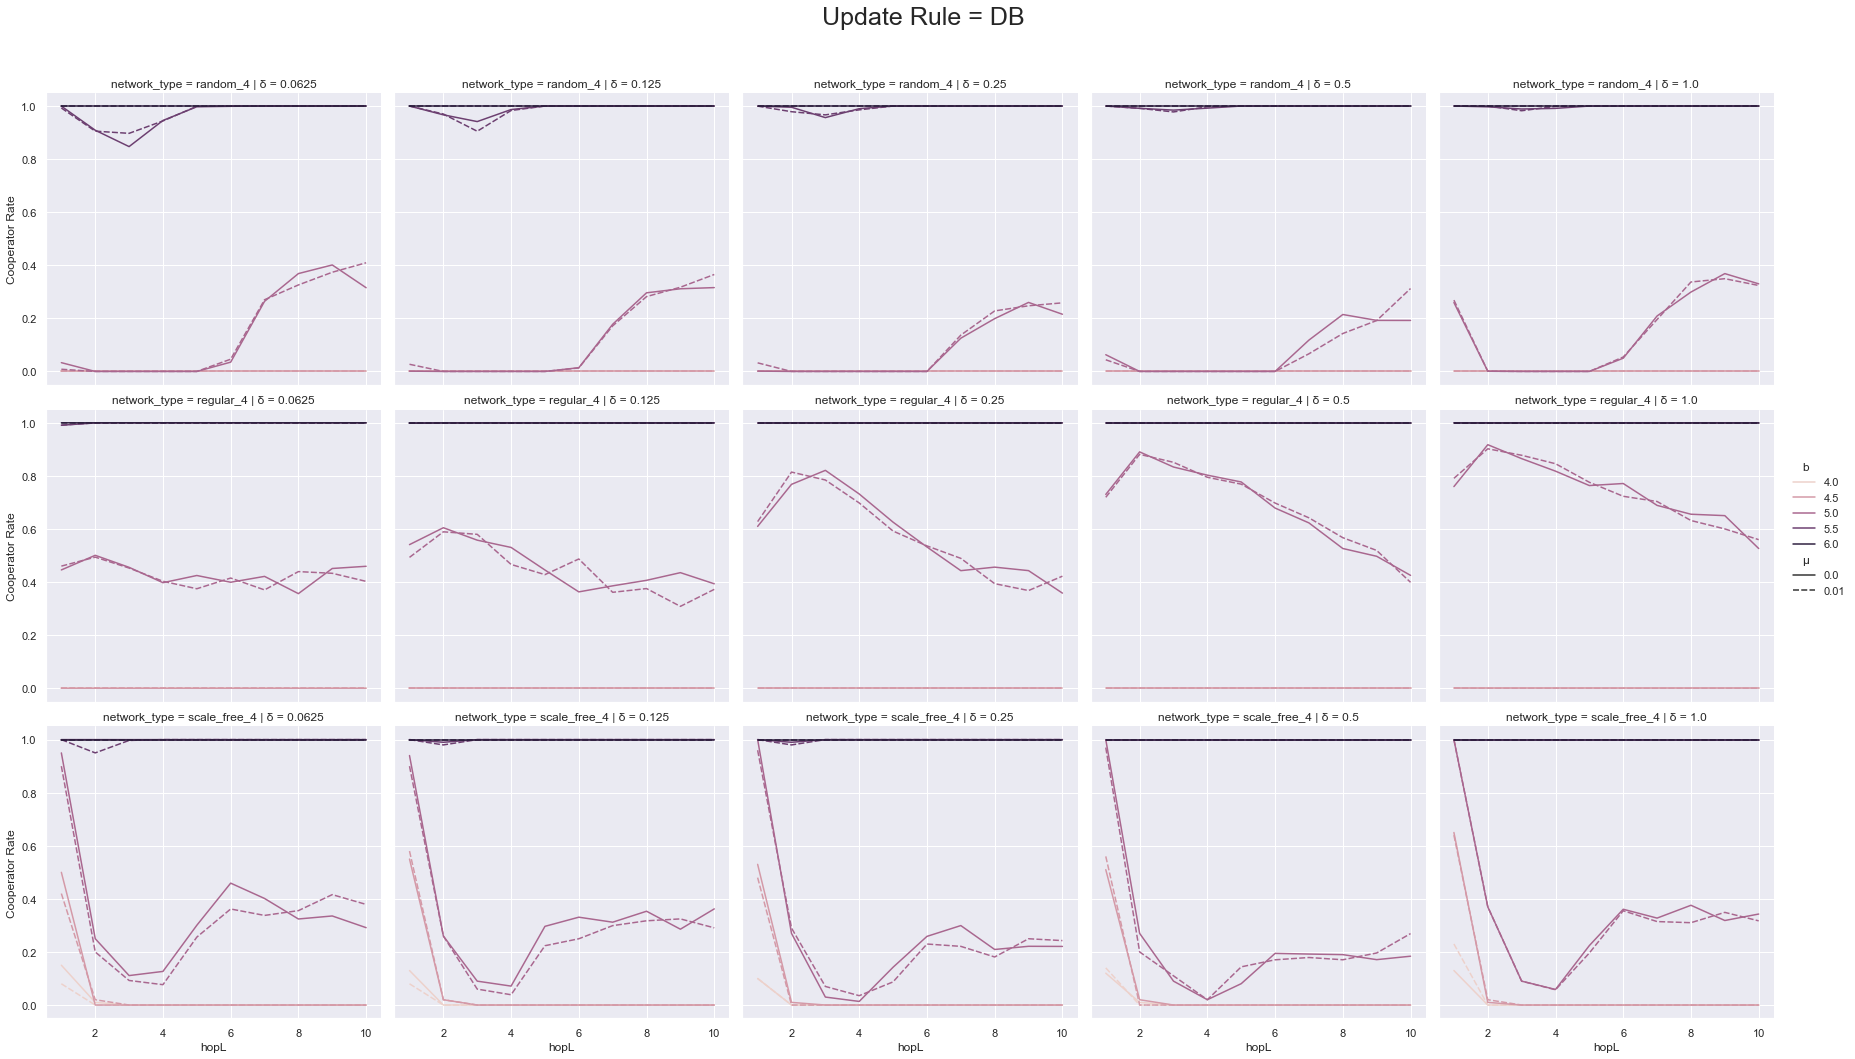

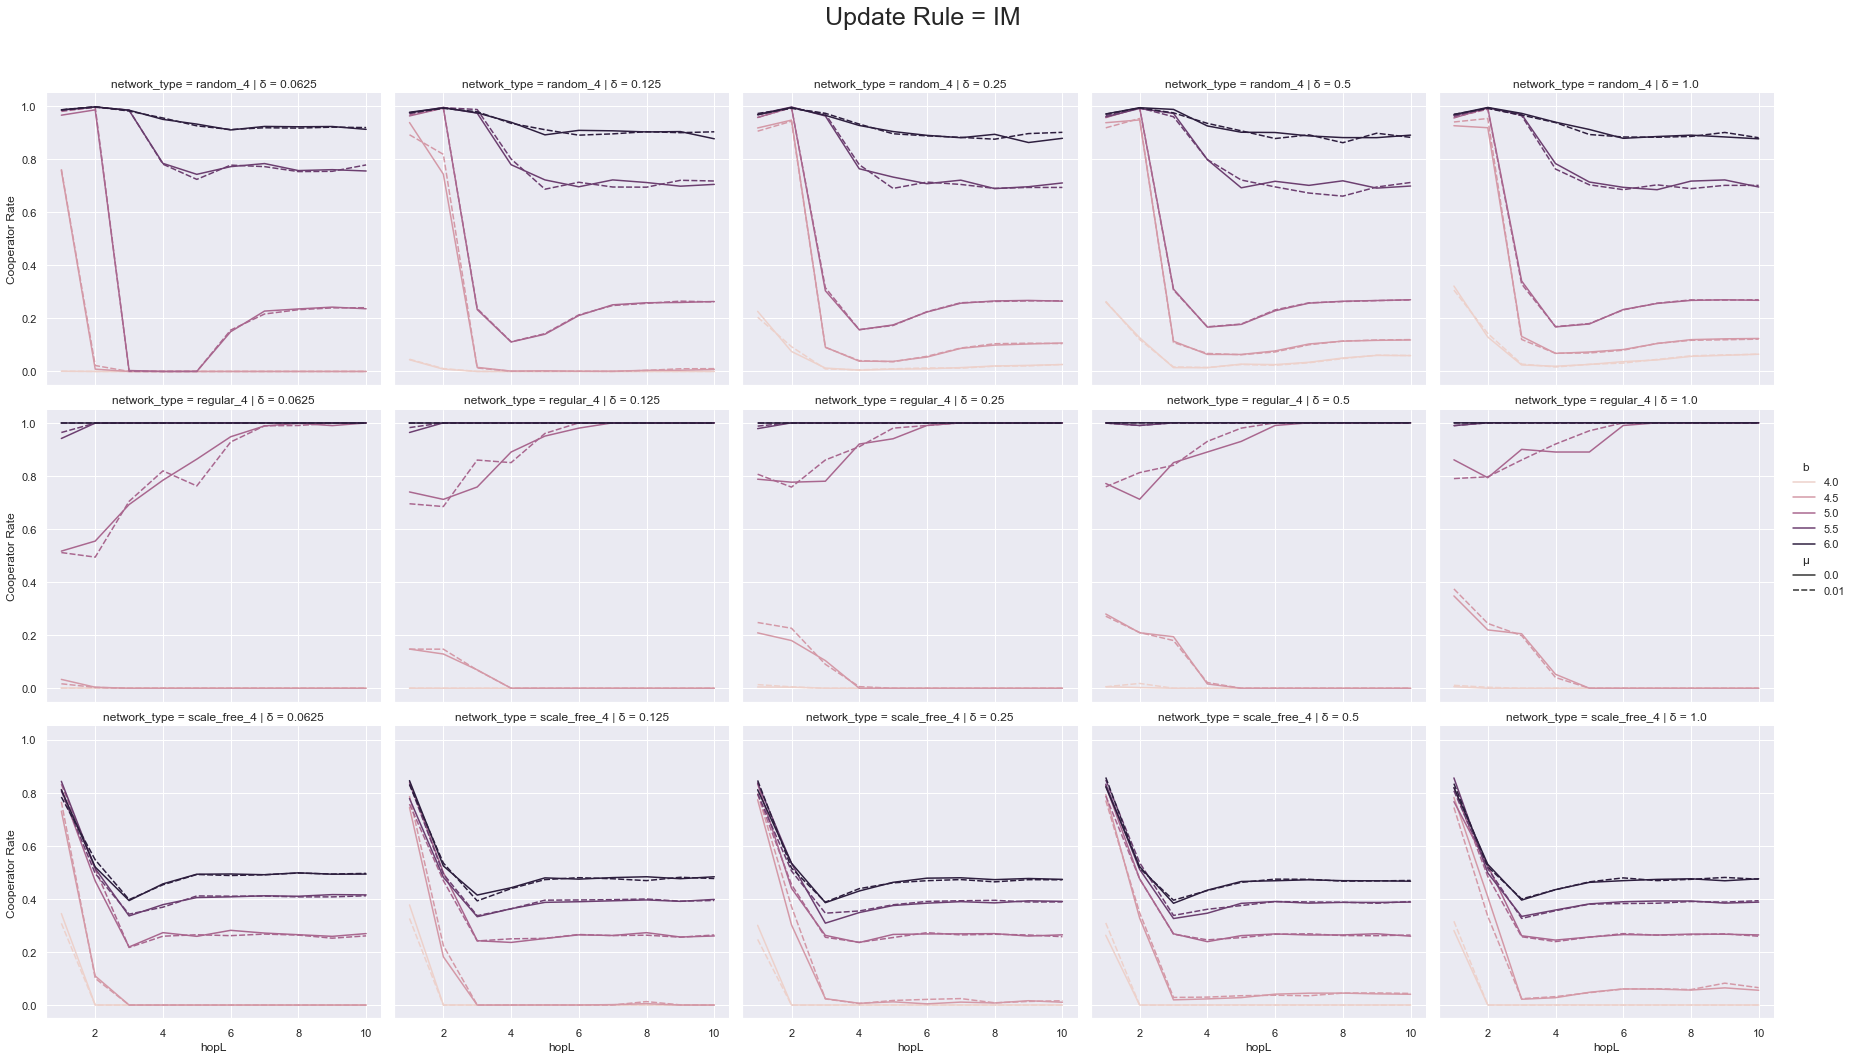

In [4]:
%%time
for (_, update_rule) in df[['update_rule']].drop_duplicates().itertuples():
    _df = df[df.update_rule == update_rule]
    g = sns.relplot(kind='line', x='hop_learning', y='cooperator_rate', hue='b', style='μ', row='network_type', col='δ', data=_df)
    g.set_axis_labels('hopL', 'Cooperator Rate')
    g.fig.suptitle('Update Rule = {}'.format(update_rule), size=25)
    g.fig.subplots_adjust(top=.9)

In [5]:
# (μ, δ) = (0.0, 0.0625)
# _df = df[(df.μ == '0.0') & (df.calc_pattern.isin([1, 3])) & (df.δ == str(δ))]
# g = sns.relplot(kind='line', x='hop_learning', y='cooperator_rate', hue='b', col='network_type', row='calc_pattern', col_order=['regular_4', 'random_4', 'scale_free_4'], data=_df)
# g.set_axis_labels('hopL', 'Cooperator Rate')
# g.fig.suptitle('Mutation Rate (μ) = {}, Weak Selection (δ) = {}'.format(μ, δ), size=25)
# g.fig.subplots_adjust(top=.9)

In [6]:
# (μ, δ) = (0.0, 1.0)
# _df = df[(df.μ == '0.0') & (df.calc_pattern.isin([1, 3])) & (df.δ == str(δ))]
# g = sns.relplot(kind='line', x='hop_learning', y='cooperator_rate', hue='b', col='network_type', row='calc_pattern', col_order=['regular_4', 'random_4', 'scale_free_4'], data=_df)
# g.set_axis_labels('hopL', 'Cooperator Rate')
# g.fig.suptitle('Mutation Rate (μ) = {}, Weak Selection (δ) = {}'.format(μ, δ), size=25)
# g.fig.subplots_adjust(top=.9)

- random と scale_free で谷が生じる。
- calc_pattern 3 では、学習スコープを拡大すると、random > regular > scale_free。

- ToDo
    - 学習アルゴリズムにdeath-Birthを追加。